## The purpose of this study is to build a recommendation engine that recommends movies to users. A recommendation system is a platform that provides its users with various contents based on their preferences and likings. From Netflix to Hulu, the need to build robust movie recommendation systems is extremely important given the huge demand for personalized content of modern consumers. Recommendation systems are used not only for movies, but on multiple other products and services like Amazon (Items, Books), Spotify/Pandora (Music), Google (News, Search), YouTube (Videos) etc. 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
movies=pd.read_csv('movies.csv')

In [3]:
ratings=pd.read_csv('ratings.csv')

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
final_data = ratings.pivot(index='movieId',columns='userId',values='rating')
final_data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,4.0,5.0,3.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0
3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.5


In [7]:
combine=pd.merge(movies,ratings,on=['movieId'],how='right') #(using right join)

In [8]:
combine.head()

,movieId,title,genres,userId,rating,timestamp
0,16,Casino (1995),Crime|Drama,1,4.0,1217897793
1,16,Casino (1995),Crime|Drama,9,4.0,842686699
2,16,Casino (1995),Crime|Drama,12,1.5,1144396284
3,16,Casino (1995),Crime|Drama,24,4.0,963468757
4,16,Casino (1995),Crime|Drama,29,3.0,836820223


In [9]:
combine.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

<AxesSubplot:>

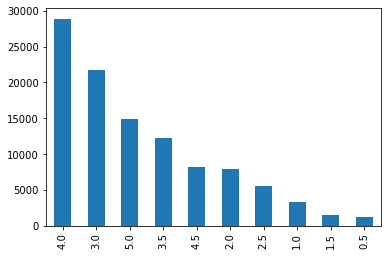

In [10]:
combine['rating'].value_counts().plot.bar()

In [11]:
final_data=final_data.fillna(0)

In [12]:
final_data

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
pd.crosstab(combine['userId'],combine['rating'])

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
userId,,,,,,,,,,
1,6,0,6,1,4,12,21,26,25,12
2,0,0,0,2,0,5,0,16,0,6
3,0,0,0,0,0,32,0,24,0,17
4,0,1,0,4,0,14,0,60,0,45
5,7,3,3,3,4,5,16,14,5,8
...,...,...,...,...,...,...,...,...,...,...
664,0,3,1,3,2,8,4,15,5,33
665,2,3,6,18,28,47,64,44,12,3
666,0,35,0,32,0,43,0,51,0,64


In [14]:
combine['genres']=combine['genres'].str.replace("|",",")

In [15]:
combine['genres']=combine['genres'].str.split(",")

In [16]:
combine

,movieId,title,genres,userId,rating,timestamp
0,16,Casino (1995),"[Crime, Drama]",1,4.0,1217897793
1,16,Casino (1995),"[Crime, Drama]",9,4.0,842686699
2,16,Casino (1995),"[Crime, Drama]",12,1.5,1144396284
3,16,Casino (1995),"[Crime, Drama]",24,4.0,963468757
4,16,Casino (1995),"[Crime, Drama]",29,3.0,836820223
...,...,...,...,...,...,...
105334,140098,Runoff (2015),[Drama],668,2.5,1450415424
105335,140816,Tangerine (2015),"[Comedy, Drama]",668,2.5,1443288791
105336,141472,The 50 Year Argument (2014),[(no genres listed)],668,2.5,1442679119
105337,142488,Spotlight (2015),[Thriller],668,4.0,1451535844


In [17]:
# since we exploring the item based collaborative filtering algorithm for starters, it is useful to do the following.

# we will also be exploring content based, low rank matrix factorization and maybe experiment with deep learning,
# after item based collaborative filtering algo. 

Removing Noise from the data ---

In the real world, ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users. Movies that were rated very few times and users who have rated very few movies are not credible enough to be taken into consideration while building our recommendation system

So we reduce the noise by adding some filters for the final dataset.
We set the filter as follows;
To qualify a movie, a minimum of 10 users should have voted a movie.
To qualify a user, a minimum of 50 movies should have voted by the user.

In [18]:
# Aggregating the number of users who have voted and the number of movies that were voted for

no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

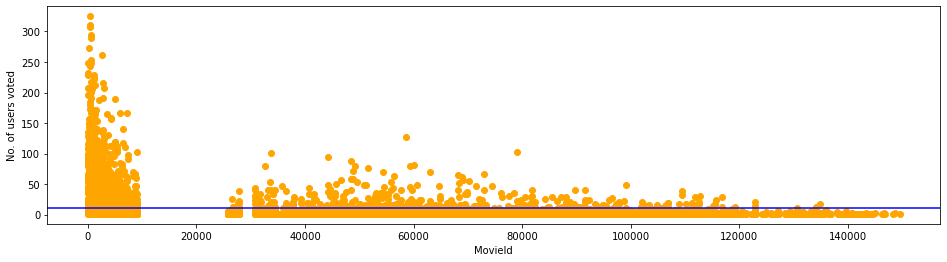

In [19]:
# visualizing the number of users who have voted keeping our threshold of 10.

f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='orange')
plt.axhline(y=10,color='b')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [20]:
# Making the necessary modifications as per the threshold set.

final_data = final_data.loc[no_user_voted[no_user_voted > 10].index,:]

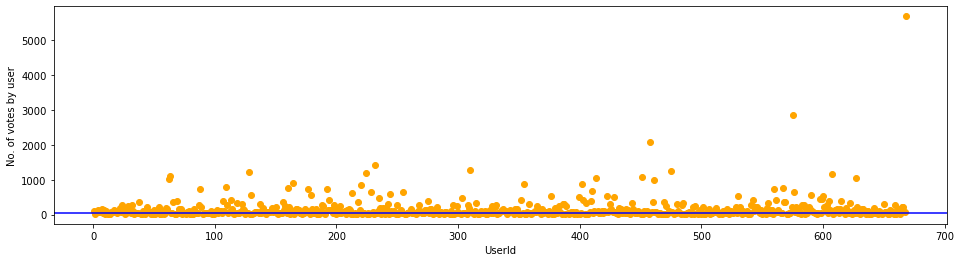

In [21]:
# visualize the number of votes by each user keeping our threshold of 50.

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='orange')
plt.axhline(y=50,color='b')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [22]:
final_data.shape

(2160, 668)

In [23]:
# Making the necessary modifications as per the threshold set

final_data=final_data.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_data

userId,1,3,4,5,6,7,8,9,11,15,...,656,657,659,661,662,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5
122882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
122892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5


In [24]:
final_data.shape

(2160, 420)

In [25]:
# Our final_dataset has dimensions of 2160 * 420 where most of the values are sparse.
# To reduce the sparsity we can use the csr_matrix function from the scipy library.
# Since this is a small dataset sparsity may affect it less compared to the entire dataset which may contain exceptionally
# high feature, where our system may not be able to handle it computationally. 

In [26]:
from scipy.sparse import csr_matrix

In [27]:
csr_data = csr_matrix(final_data.values)
final_data.reset_index(inplace=True)

# 1.Item-Based Collaborative Filtering:

### We will be using the KNN algorithm to compute similarity with cosine distance metric which is very fast and more preferable than pearson coefficient.

In [28]:
from sklearn.neighbors import NearestNeighbors

In [29]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [30]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_data[final_data['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_data.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [31]:
get_movie_recommendation('8 Mile')

,Title,Distance
1,"Book of Eli, The (2010)",0.537432
2,Boyz N the Hood (1991),0.527281
3,Starsky & Hutch (2004),0.521294
4,Gran Torino (2008),0.509062
5,King Kong (2005),0.507424
6,"Fast & Furious (Fast and the Furious 4, The) (...",0.494358
7,Charlie's Angels: Full Throttle (2003),0.475582
8,"Wrestler, The (2008)",0.458337
9,"Chronicles of Riddick, The (2004)",0.458166
10,"2 Fast 2 Furious (Fast and the Furious 2, The)...",0.430273


### Let's try for another movie

In [32]:
get_movie_recommendation('Harry Potter')

,Title,Distance
1,X-Men (2000),0.528543
2,"Sixth Sense, The (1999)",0.521703
3,"Monsters, Inc. (2001)",0.499450
4,Ocean's Eleven (2001),0.497019
5,Harry Potter and the Goblet of Fire (2005),0.490896
6,"Lord of the Rings: The Fellowship of the Ring,...",0.482158
7,Shrek (2001),0.471851
8,Spider-Man (2002),0.457348
9,Harry Potter and the Prisoner of Azkaban (2004),0.373413
10,Harry Potter and the Chamber of Secrets (2002),0.307015


### As we can see, the model recommends similar Fantasy/Superhero movies to Harry Potter. Our model works quite well, i.e a movie recommendation system based on user behavior. Hence, we conclude our Item-based collaborative filtering for Movie Recommendation here.

# 2. Content-Based Filtering:

### The Content-Based Recommender relies on the similarity of the items being recommended. The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used here.

### We will build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre.

### We do not have a quantitative metric to judge the machine’s performance so this will have to be done qualitatively. In order to do so, we will use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator. This can be understood as Pre-processing the data. 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])

### We will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give me the Cosine Similarity Score. Therefore, we will use sklearn’s linear_kernel instead of cosine_similarities since it is much faster.

In [34]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### We now have a pairwise cosine similarity matrix for all the movies in the dataset. The next step is to write a function that returns the 20 most similar movies based on the cosine similarity score.

In [35]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

### Let’s try and get the top recommendations for a few movies and see how good the recommendations are.

In [36]:
genre_recommendations('2001: A Space Odyssey (1968)').head(20)

745                          2001: A Space Odyssey (1968)
827                   20,000 Leagues Under the Sea (1954)
1064    Until the End of the World (Bis ans Ende der W...
2756            Close Encounters of the Third Kind (1977)
3424                  A.I. Artificial Intelligence (2001)
5383                                    Enemy Mine (1985)
5701                  Philadelphia Experiment, The (1984)
9843                        Day of the Doctor, The (2013)
1369                                  Postman, The (1997)
3637                            Planet of the Apes (2001)
4870                                      THX 1138 (1971)
8305                Battlestar Galactica: The Plan (2009)
7338                                      Sunshine (2007)
23                                          Powder (1995)
1059                              Forbidden Planet (1956)
1264                                       Contact (1997)
1572                                    Metropolis (1927)
1676          

### Let's try for another movie

In [37]:
genre_recommendations('Harry Potter and the Prisoner of Azkaban (2004)').head(20)

8451                           Alice in Wonderland (2010)
9537            Hobbit: An Unexpected Journey, The (2012)
9617                         Jack the Giant Slayer (2013)
9838          Hobbit: The Desolation of Smaug, The (2013)
8777    Harry Potter and the Deathly Hallows: Part 1 (...
8989    Pirates of the Caribbean: On Stranger Tides (2...
9315                           Wrath of the Titans (2012)
9622                     Oz the Great and Powerful (2013)
9820                          Thor: The Dark World (2013)
7423     Harry Potter and the Order of the Phoenix (2007)
1696                             Dark Crystal, The (1982)
2294                                     Excalibur (1981)
3008               Sinbad and the Eye of the Tiger (1977)
3885    Lord of the Rings: The Fellowship of the Ring,...
4385       Harry Potter and the Chamber of Secrets (2002)
4457        Lord of the Rings: The Two Towers, The (2002)
4473                          Thief of Bagdad, The (1940)
4925          

### Let's try for another movie

In [38]:
genre_recommendations('Saving Private Ryan (1998)').head(20)

412                         Heaven & Earth (1993)
969                         Apocalypse Now (1979)
993                  Boot, Das (Boat, The) (1981)
1496        All Quiet on the Western Front (1930)
1590                   Saving Private Ryan (1998)
1936                    Thin Red Line, The (1998)
2354                      Dirty Dozen, The (1967)
2449                      Longest Day, The (1962)
2452                     Tora! Tora! Tora! (1970)
2732                              Red Dawn (1984)
2793                Force 10 from Navarone (1978)
2879                 Fighting Seabees, The (1944)
2966                          Patriot, The (2000)
3855                    Behind Enemy Lines (2001)
3891                                Sahara (1943)
3899                       Black Hawk Down (2001)
3998                      We Were Soldiers (2002)
4155                           Windtalkers (2002)
4432                                  Zulu (1964)
4438    Victory (a.k.a. Escape to Victory) (1981)


### Let's try for another movie

In [39]:
genre_recommendations('Silence of the Lambs, The (1991)').head(20)

1714             Henry: Portrait of a Serial Killer (1986)
1899                                         Psycho (1998)
3639                                           Cure (1997)
4246     FearDotCom (a.k.a. Fear.com) (a.k.a. Fear Dot ...
4253                    Last House on the Left, The (1972)
6823                                     Wolf Creek (2005)
7184                                        Saw III (2006)
7398                                Hostel: Part II (2007)
7527                                         Saw IV (2007)
7807                                      Pathology (2008)
7922                                          Saw V (2008)
8181                                 Collector, The (2009)
8861                           I Spit on Your Grave (2010)
9200                                         Fright (1972)
9696                                     Purge, The (2013)
9761                                Black Room, The (1935)
9781                         I Spit on Your Grave 2 (201

### As you can see, we have quite a decent list of recommendation for 2001: Space Odyssey ( Adventure,Drama,Sci-Fi ), Harry Potter ( Adventure,Fantasy ), Saving Private Ryan ( Action, Thriller, War ) and Silence of the Lambs ( Crime,Horror,Thriller )

### Pros of using Content-Based Recommendation:
* No need for data on other users, thus no cold-start or sparsity problems.
* Can recommend to users with unique tastes.
* Can recommend new & unpopular items.
* Can provide explanations for recommended items by listing content features that caused an item to be recommended (in this case, movie genres)

### Cons of using this approach:
* Finding the appropriate features is hard.
* Does not recommend items outside a user’s content profile.
* Unable to exploit quality judgments of other users.

### We conclude our Content-Based Filtering for Movie Recommendation here.

### As we will see, we will use some more algorithms such as 3.Memory-based Collaborative filtering (Pearson similarity), 4.Model-based collaborative filtering (Matrix factorization, Dimensionality reduction) and 5.Deep learning (Adam based) to handle some of the cons and disadvantages that we have experienced so far in building a highly effective recommendation engine. 